In [1]:
#Run this notebook in the root directory of the project
%cd ../../../

/data/main/2024/GridCellsCond


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sim_utils as s_utils
import h5py
import seaborn as sns
import analysis_utils as a_utils
import matplotlib.patches as patches

In [3]:
sim_id = 'VALD-MPD-FSPK-S-s-1a'
params_1 = s_utils.load_sim_params(sim_id)
stell_spks_l_1, intrnrn_spks_l_1 = s_utils.load_spikes(sim_id)
stellate_v_1= np.array(s_utils.load_full_data(sim_id,"stell_v"))
inhib_v_1= np.array(s_utils.load_full_data(sim_id,"stell_syn_inhib_g"))
gh_slow_1= np.array(s_utils.load_full_data(sim_id,"stell_ih_ms"))*params_1["g_h_bar"]*0.35
gh_fast_1= np.array(s_utils.load_full_data(sim_id,"stell_ih_mf"))*params_1["g_h_bar"]*0.65
gh_1 = gh_slow_1+gh_fast_1



In [4]:
separated_fields_shifted_1=a_utils.shift_fields_to_center(stell_spks_l_1[:params_1["N_per_sheet"]])
separated_fields_1=a_utils.separate_fields(stell_spks_l_1[:params_1["N_per_sheet"]])



In [5]:
cell_to_plot=80
field_to_plot=3
center_1=(separated_fields_1[cell_to_plot][field_to_plot][0]+separated_fields_1[cell_to_plot][field_to_plot][-1])/2


In [6]:
def convert_ms_to_idx(ms,params):
    return int(ms/params["dt"])



In [7]:
g_start=gh_1[cell_to_plot][convert_ms_to_idx(separated_fields_1[cell_to_plot][field_to_plot][0],params_1)]
g_end=gh_1[cell_to_plot][convert_ms_to_idx(separated_fields_1[cell_to_plot][field_to_plot][-1],params_1)]
inhib_start=inhib_v_1[cell_to_plot][convert_ms_to_idx(separated_fields_1[cell_to_plot][field_to_plot][0],params_1)]
inhib_end=inhib_v_1[cell_to_plot][convert_ms_to_idx(separated_fields_1[cell_to_plot][field_to_plot][-1],params_1)]

In [8]:
print(f"g_start: {g_start:.2e}")
print(f"g_end: {g_end:.2e}")
print(f"inhib_start: {inhib_start:.2e}")
print(f"inhib_end: {inhib_end:.2e}")


g_start: 2.47e-04
g_end: 4.19e-05
inhib_start: 2.92e-04
inhib_end: 2.40e-06


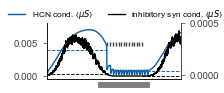

In [9]:
%matplotlib inline
from matplotlib import colors
look_behind = 850
look_ahead = 650
plt.style.use("analysis/config/paper.mplstyle")
start_idx_1,end_idx_1=convert_ms_to_idx(separated_fields_1[cell_to_plot][field_to_plot][0]-look_behind,params_1),convert_ms_to_idx(separated_fields_1[cell_to_plot][field_to_plot][-1]+look_ahead,params_1)


plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams["axes.spines.right"]=True
plt.rcParams["axes.spines.right"]=True

plt.rcParams["ytick.color"]="#3d3d3d"
plt.rcParams["xtick.color"]="#3d3d3d"

plt.rcParams["ytick.labelsize"]=7
plt.rcParams["xtick.labelsize"]=7





t = np.arange(0,params_1['sim_dur']+0.025,0.025)
fig,ax= plt.subplots(1,1,figsize=(1.731,0.73))

def forward(x):
    return np.tanh(x)/30
def inverse(x):
    return np.arctanh(x)/30
cell_to_plot=80
line1=ax.plot(t[start_idx_1:end_idx_1],inhib_v_1[cell_to_plot][start_idx_1:end_idx_1],color="k",label="inhibitory syn cond. ($\\mu S$)")
ax2 = ax.twinx()
ax2.plot(t[start_idx_1:end_idx_1],gh_1[cell_to_plot][start_idx_1:end_idx_1],color="#0C5DA5",label="HCN cond. ($\\mu S$)")
ax2.legend()
handles1, labels1 = ax.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
first_legend = plt.legend(handles1, labels1, loc='upper left', bbox_to_anchor=(0.4, 1.4),fancybox=False,fontsize=6)
ax2.add_artist(first_legend)
ax2.set_xlim([2000,3300])
leg=ax2.legend(loc='upper right', bbox_to_anchor=(0.4, 1.4),fancybox=False,fontsize=6)
ax.spines["top"].set_visible(False)

ax2.hlines(g_start,xmin=0,xmax=separated_fields_1[cell_to_plot][field_to_plot][0],linewidth=0.65,linestyle="dashed",color="#0C5DA5")
ax.hlines(inhib_start,xmin=0,xmax=separated_fields_1[cell_to_plot][field_to_plot][0],color="k",linestyle="dashed",linewidth=0.65,zorder=999)

ax2.hlines(g_end,xmin=separated_fields_1[cell_to_plot][field_to_plot][-1],xmax=6000,linewidth=0.65,linestyle="dashed",color="#0C5DA5",zorder=99)
ax.hlines(inhib_end,xmax=6000,xmin=separated_fields_1[cell_to_plot][field_to_plot][-1],color="k",linestyle="dashed",linewidth=0.65,zorder=999)

ax.set_zorder(1)  # default zorder is 0 for ax1 and ax2
ax.patch.set_visible(False)  # prevents ax1 from hiding ax2
ax.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax.set_ylim(-0.0005,0.008)
ax2.set_ylim(-0.00004,0.0005)

ax2.eventplot(separated_fields_1[cell_to_plot][field_to_plot],lineoffsets=0.0003,linelengths=0.00004,color="#474747",zorder=99,linewidths=1)
rect = patches.Rectangle((2500, -0.0018),500,0.0009, edgecolor='none', facecolor='gray',clip_on=False)
ax.add_patch(rect)

plt.draw()
ax.set_xticks([])
plt.savefig('analysis/figures/Fig3/Fig3_D.svg')

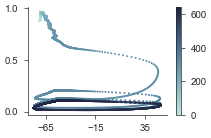

In [50]:
%matplotlib inline
plt.style.use("analysis/config/paper.mplstyle")
from matplotlib import colors
sns.set_style('white', {'axes.linewidth': 0.5})
# plt.rcParams['xtick.major.size'] = 4
# plt.rcParams['xtick.major.width'] = 1.25
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
palette=sns.color_palette("ch:s=0,rot=-.25", as_cmap=True)


t = np.arange(0,params_1['sim_dur']+0.025,0.025)
fig,ax= plt.subplots(1,1,figsize=(1.8,1.4))

def forward(x):
    return np.tanh(x)/30
def inverse(x):
    return np.arctanh(x)/30

t1=int((separated_fields_1[cell_to_plot][field_to_plot][0]-300)/0.025)
t2=int((separated_fields_1[cell_to_plot][field_to_plot][-1])/0.025)

gh_trunc_1 = gh_1[cell_to_plot][t1:t2]/np.max(gh_1[cell_to_plot])
t_trunc = t[t1:t2]
spks = np.array(stell_spks_l_1[cell_to_plot])/1000
v1_trunc = stellate_v_1[cell_to_plot][t1:t2]
p=sns.scatterplot(x=v1_trunc,y=gh_trunc_1,hue=t_trunc,linewidth=0,ax=ax,s=2,rasterized=True,palette=palette)
norm = plt.Normalize(0, np.max(t_trunc)-np.min(t_trunc))
sm = plt.cm.ScalarMappable(cmap=palette, norm=norm)
sm.set_array([])
ax.get_legend().remove()
cax = fig.add_axes([ax.get_position().x1+0.05, ax.get_position().y0, 0.03, ax.get_position().height])
ax.figure.colorbar(sm, cax=cax)
ax.set_xticks(np.arange(-65,40,25))

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.draw()
yticks = ax.get_yticks()
ax.set_yticks([yticks[1],yticks[3], yticks[-2]])
xticks = ax.get_xticks()
ax.set_xticks([xticks[0],xticks[int(len(xticks)/2)], xticks[-1]])
plt.savefig('analysis/figures/Fig3/Fig3_E.svg',dpi=500)